In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from math import *
from Y_views import *
%matplotlib inline

# Reading data

In [2]:
all_hits = pd.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


# Comparing result of the algorithm and reality

In [11]:
# function for testing 
def tester(event_id):
    event0 = all_hits[all_hits['event'] == event_id]
    event0 = modify_for_yz_analisys(event0)
    
    tracks, linking_table = loop_yz(event0, 7, 0.85)
    
    trackIDs = set(event0.TrackID.values)
    trackIDs.discard(-2)
    real_tracks = {}
    for i in trackIDs:
        real_tracks[i] = np.polyfit(event0[event0['TrackID'] == i]['Z'].values,
                                    event0[event0['TrackID'] == i]['Y'].values, 1)
        
    plt.scatter(event0['Wz'], event0['Wy'])
    t = np.arange(2550, 2850, 299)
    for i in tracks:
        plt.plot(t, tracks[i][0] * t + tracks[i][1], lw = 2, c = 'black')
    for i in real_tracks:
        plt.plot(t, real_tracks[i][0] * t + real_tracks[i][1], lw = 2, c = 'green')
    print "event_id:" + str(event_id)
    print "number of hits:" + str(len(event0))
    print "number of recognised tracks: " + str(len(tracks))
    print "number of real tracks: " + str(len(real_tracks))
    print "green - real tracks; black - recognised tracks"
    plt.show()
    print "linking_table:"
    print linking_table
    print "tracks:"
    print tracks

# Test 1

event_id:14
number of hits:9
number of recognised tracks: 1
number of real tracks: 1
green - real tracks; black - recognised tracks


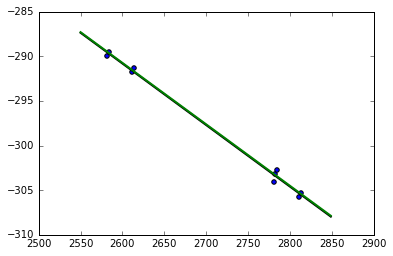

linking_table:
{1: [3064, 3073, 3071, 3063, 3080, 3074, 3070, 3072, 3081]}
tracks:
{1: array([ -6.88790514e-02,  -1.11729524e+02])}


In [12]:
tester(14)

# Test 2

event_id:3
number of hits:1090
number of recognised tracks: 32
number of real tracks: 19
green - real tracks; black - recognised tracks


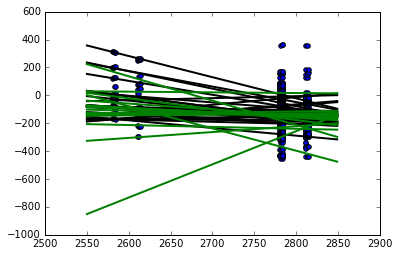

linking_table:
{1: [116, 1069, 132, 1019, 1011, 1141, 1186, 1010, 1140, 748, 131, 623, 2093, 2455, 1139, 749, 1454], 2: [210, 335, 532, 1515, 207, 632, 1114, 209, 251, 533, 1516, 208, 2061], 3: [235, 372, 124, 1456, 2640, 2632, 122, 758, 234, 304, 1779, 2397, 658, 123], 4: [296, 2008, 1455, 999, 1134, 2000, 1006, 295, 2007, 1000, 2001, 998, 1133, 1998, 1007, 2040], 5: [523, 821, 526, 524, 2034, 525, 1453], 6: [1419, 202, 201, 481, 628, 1418, 203, 820, 330], 7: [2043, 1722, 2287, 2341, 1491, 1721, 2514, 2017, 117, 1785, 2334, 724, 2340, 1492, 2342, 2515, 2018], 8: [502, 172, 2625, 1777, 2067, 1948, 173, 509, 897, 2358, 1968, 660, 2066], 9: [894, 937, 1533, 1939, 2411, 179, 2041, 458, 903, 938, 1724, 2410, 288, 2412, 664, 1138], 10: [2064, 298, 896, 940, 972, 171, 510, 612, 176, 503, 1946, 2065, 228, 460, 753, 2010, 661, 1947], 11: [463, 911, 1044, 910, 1043, 654, 948, 2375, 2385, 2637, 1711], 12: [760, 1714, 2399, 2623, 2631, 309, 310, 979, 787, 1715, 786, 656], 13: [1052, 1490, 1553, 2

In [13]:
#according to the article for events with more than 500 hits algorithm does not work
tester(3)

# Test 3

event_id:7
number of hits:17
number of recognised tracks: 1
number of real tracks: 2
green - real tracks; black - recognised tracks


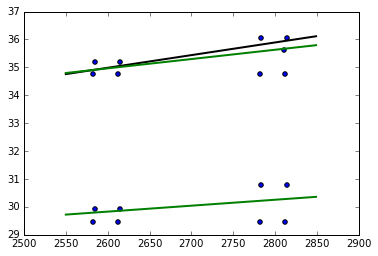

In [6]:
tester(7)

# Test 4

event_id:51
number of hits:9
number of recognised tracks: 1
number of real tracks: 1
green - real tracks; black - recognised tracks


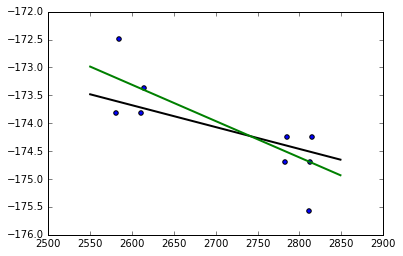

In [7]:
tester(51)

# Test 5

event_id:17
number of hits:9
number of recognised tracks: 1
number of real tracks: 1
green - real tracks; black - recognised tracks


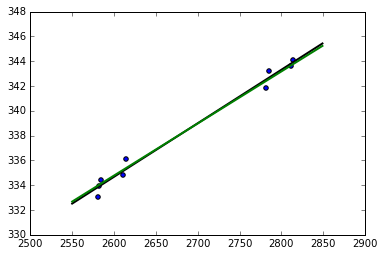

In [8]:
tester(17)